# Discount Factors vs. At-Maturity Factors

This notebook examines the relationship between discount factors and at-maturity factors (future value factors), and how exponential interpolation applies to both.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## The Relationship

Discount factors (DF) and at-maturity factors (AtMat) are inversely related:

$$AtMat = \frac{1}{DF}$$

Both represent the same information in different forms:
- **Discount factor**: Present value of 1 unit of currency at a future date
- **At-maturity factor**: Future value of 1 unit of currency invested today

In [2]:
# Example: Convert between DF and AtMat
r = 0.05  # 5% continuously compounded rate
t = 2.0   # 2 years

# Calculate discount factor
df = math.exp(-r * t)

# Calculate at-maturity factor
atmat = math.exp(r * t)

# Verify relationship
atmat_from_df = 1 / df
df_from_atmat = 1 / atmat

print(f"Discount Factor: {df:.6f}")
print(f"At-Maturity Factor: {atmat:.6f}")
print(f"AtMat from DF: {atmat_from_df:.6f}")
print(f"DF from AtMat: {df_from_atmat:.6f}")

Discount Factor: 0.904837
At-Maturity Factor: 1.105171
AtMat from DF: 1.105171
DF from AtMat: 0.904837


## Relationship to Continuous Compounding

Both factors are expressed in terms of continuously compounded rates:

$$DF(t) = e^{-r \cdot t}$$
$$AtMat(t) = e^{r \cdot t}$$

From these equations, we can extract the continuously compounded rate:

$$r = -\frac{\ln(DF)}{t} = \frac{\ln(AtMat)}{t}$$

In [3]:
# Extract rate from factors
r_from_df = -math.log(df) / t
r_from_atmat = math.log(atmat) / t

print(f"Original rate: {r:.4f}")
print(f"Rate from DF: {r_from_df:.4f}")
print(f"Rate from AtMat: {r_from_atmat:.4f}")

Original rate: 0.0500
Rate from DF: 0.0500
Rate from AtMat: 0.0500


## Exponential Interpolation

Exponential interpolation works equivalently for both discount factors and at-maturity factors.

For discount factors $DF_1$ and $DF_2$ at times $t_1$ and $t_2$:
$$DF(t) = DF_1 \cdot \left(\frac{DF_2}{DF_1}\right)^{\frac{t-t_1}{t_2-t_1}}$$

For at-maturity factors $AtMat_1$ and $AtMat_2$ at times $t_1$ and $t_2$:
$$AtMat(t) = AtMat_1 \cdot \left(\frac{AtMat_2}{AtMat_1}\right)^{\frac{t-t_1}{t_2-t_1}}$$

In [4]:
# Example: Interpolation with both representations
t1, t2 = 1.0, 3.0

# Generate factors at these points
r_curve = 0.06  # 6% continuous rate
df1 = math.exp(-r_curve * t1)
df2 = math.exp(-r_curve * t2)
atmat1 = 1 / df1
atmat2 = 1 / df2

# Interpolation point
t_mid = 2.0
weight = (t_mid - t1) / (t2 - t1)

# Interpolate using both methods
df_interp = df1 * (df2 / df1)**weight
atmat_interp = atmat1 * (atmat2 / atmat1)**weight

print(f"Interpolated DF at t={t_mid}: {df_interp:.6f}")
print(f"Interpolated AtMat at t={t_mid}: {atmat_interp:.6f}")
print(f"Relationship check: AtMat = 1/DF? {atmat_interp:.6f} vs {1/df_interp:.6f}")

Interpolated DF at t=2.0: 0.886920
Interpolated AtMat at t=2.0: 1.127497
Relationship check: AtMat = 1/DF? 1.127497 vs 1.127497


## Visualization

Let's visualize how discount factors decrease while at-maturity factors increase over time:

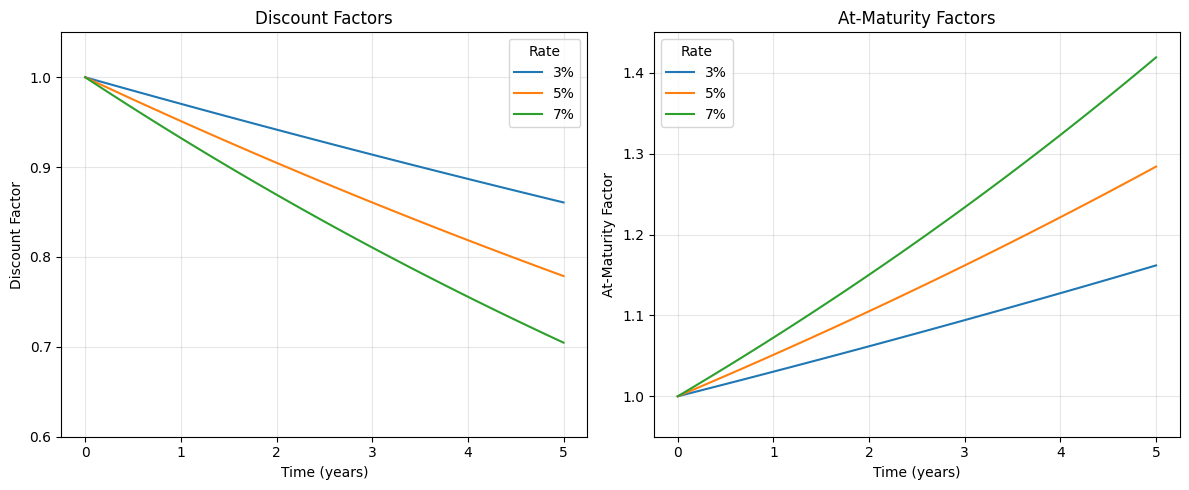

In [5]:
# Generate curves for different rates
times = np.linspace(0, 5, 100)
rates = [0.03, 0.05, 0.07]  # 3%, 5%, 7%

plt.figure(figsize=(12, 5))

# Plot discount factors
plt.subplot(1, 2, 1)
for rate in rates:
    dfs = [math.exp(-rate * t) for t in times]
    plt.plot(times, dfs, label=f'{rate*100:.0f}%')

plt.ylim(0.6, 1.05)
plt.title('Discount Factors')
plt.xlabel('Time (years)')
plt.ylabel('Discount Factor')
plt.grid(alpha=0.3)
plt.legend(title='Rate')

# Plot at-maturity factors
plt.subplot(1, 2, 2)
for rate in rates:
    atmats = [math.exp(rate * t) for t in times]
    plt.plot(times, atmats, label=f'{rate*100:.0f}%')

plt.ylim(0.95, 1.45)
plt.title('At-Maturity Factors')
plt.xlabel('Time (years)')
plt.ylabel('At-Maturity Factor')
plt.grid(alpha=0.3)
plt.legend(title='Rate')

plt.tight_layout()
plt.show()

## Practical Considerations

**Choosing between representations:**

1. **Discount factors** are typically used for:
   - Pricing fixed cash flows (bonds, swaps)
   - Yield curve construction
   - Risk management calculations

2. **At-maturity factors** are useful for:
   - Compounding calculations
   - Forward rate agreements
   - Investment return analysis

Both representations can be used interchangeably, with the choice often depending on the specific application or personal preference.